In [7]:
from PIL import Image
import torch
import torchvision.transforms as transforms
from torchvision.models.detection import ssd300_vgg16
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load image
img_path_cup = '/content/drive/MyDrive/Samples/cup.jpg'
img_path_bear = '/content/drive/MyDrive/Samples/teddy_bear.jpg'
img_path_bench = '/content/drive/MyDrive/Samples/bench.jpg'

def load_image(img_path):
    img = Image.open(img_path).convert('RGB')
    return img

img_cup = load_image(img_path_cup)
img_bear = load_image(img_path_bear)
img_bench = load_image(img_path_bench)

In [5]:
# Preprocess image
transform = transforms.Compose([
        transforms.Resize((300, 300)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

def preprocess_image(img):
    preprocessed_img = transform(img).unsqueeze(0)
    return preprocessed_img

img_preprocessed_cup = preprocess_image(img_cup)
img_preprocessed_bear = preprocess_image(img_bear)
img_preprocessed_bench = preprocess_image(img_bench)

In [6]:
# Load SSD300 model
def load_pretrained_ssd_model():
    model = ssd300_vgg16(pretrained=True)
    model.eval()    # set model as evaluation mode
    return model

model = load_pretrained_ssd_model()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSD300_VGG16_Weights.COCO_V1`. You can also use `weights=SSD300_VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/ssd300_vgg16_coco-b556d3b4.pth" to /root/.cache/torch/hub/checkpoints/ssd300_vgg16_coco-b556d3b4.pth
100%|██████████| 136M/136M [00:01<00:00, 137MB/s]


In [ ]:
# Detect object in image
def detect_object(img):
    with torch.no_grad():
        prediction = model(img)
    pred_scores = prediction[0]['scores'].numpy()
    pred_boxes = prediction[0]['boxes'].numpy()
    pred_labels = prediction[0]['labels'].numpy()
    return pred_scores, pred_boxes, pred_labels

pred_score_cup, pred_box_cup, pred_label_cup = detect_object(img_preprocessed_cup)
pred_score_bear, pred_box_bear, pred_label_bear = detect_object(img_preprocessed_bear)
pred_score_bench, pred_box_bench, pred_label_bench = detect_object(img_preprocessed_bench)

In [14]:
# Print result
max_score_idx_cup = pred_score_cup.argmax()
score_cup = pred_score_cup[max_score_idx_cup]
box_cup = pred_box_cup[max_score_idx_cup]
label_cup = pred_label_cup[max_score_idx_cup]

max_score_idx_bear = pred_score_bear.argmax()
score_bear = pred_score_bear[max_score_idx_bear]
box_bear = pred_box_bear[max_score_idx_bear]
label_bear = pred_label_bear[max_score_idx_bear]

max_score_idx_bench = pred_score_bench.argmax()
score_bench = pred_score_bench[max_score_idx_bench]
box_bench = pred_box_bench[max_score_idx_bench]
label_bench = pred_label_bench[max_score_idx_bench]

print('Cup Score:', score_cup)
print('Cup Box:', box_cup)
print('Cup Label:', label_cup)
print('\n')
print('Bear Score:', score_bear)
print('Bear Box:', box_bear)
print('Bear Label:', label_bear)
print('\n')
print('Bench Score:', score_bench)
print('Bench Box:', box_bench)
print('Bench Label:', label_bench)

Cup Score: 0.9309242
Cup Box: [ 85.1598  145.3898  250.18347 244.58023]
Cup Label: 47


Bear Score: 0.99996376
Bear Box: [ 87.05704   36.585243 244.96384  287.0194  ]
Bear Label: 88


Bench Score: 1.0
Bench Box: [119.300446 222.65825  230.21494  278.03275 ]
Bench Label: 15


In [15]:
# Class index of COCO2017
COCO_INSTANCE_CATEGORY_NAMES = [
    'background', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus','train', 'truck', 'boat', 'traffic light',
    'fire hydrant', '???', 'stop sign','parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep',
    'cow', 'elephant', 'bear', 'zebra', 'giraffe', '????', 'backpack', 'umbrella', '?_?', '?????',
    'handbag', 'tie','suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat',
    'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', '?', 'wine glass', 'cup', 'fork', 'knife', 'spoon',
    'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut',
    'cake', 'chair', 'couch', 'potted plant', 'bed', '???', 'dining table', '???', '???', 'toilet',
    '???', 'tv', 'laptop', 'mouse', 'remote','keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
    'sink', 'refrigerator', 'book', 'clock', '???', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

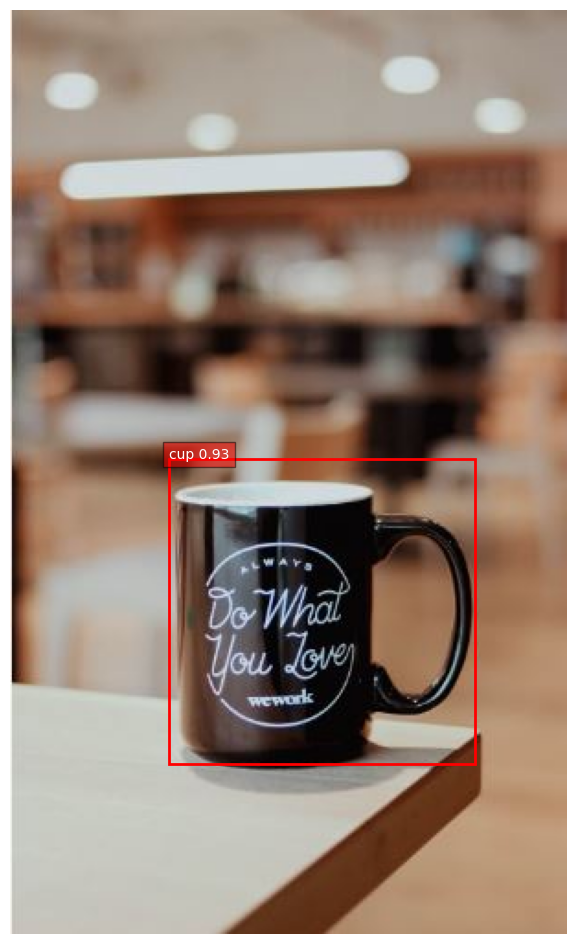

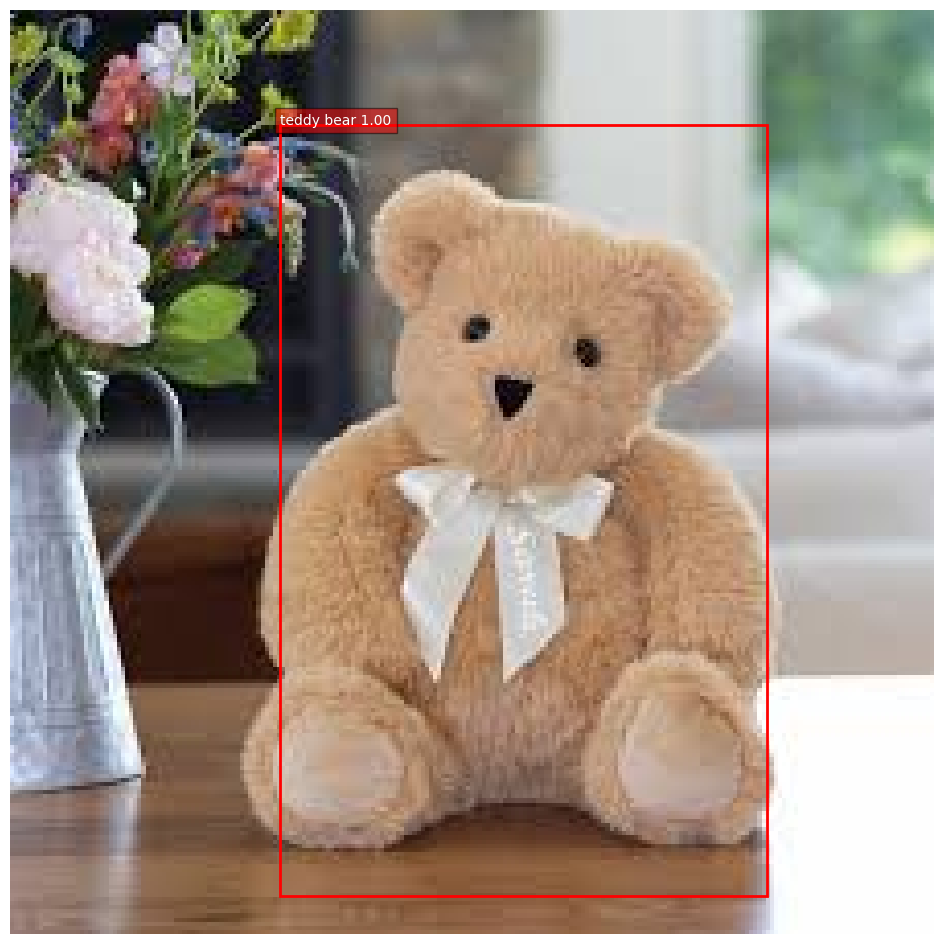

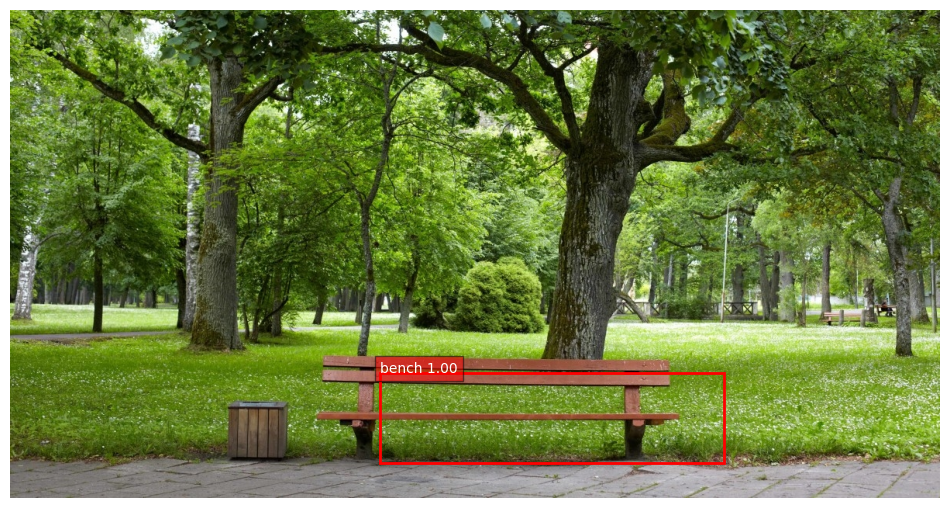

In [16]:
# Visualize result
def visualize_result(img, score, box, label):
    plt.figure(figsize=(12, 12))
    plt.imshow(img)
    ax = plt.gca()

    orig_width, orig_height = img.size
    if score > 0.5:
        x_min = (box[0] / 300) * orig_width
        y_min = (box[1] / 300) * orig_height
        x_max = (box[2] / 300) * orig_width
        y_max = (box[3] / 300) * orig_height

        rect = patches.Rectangle((x_min, y_min), x_max-x_min, y_max-y_min, linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)

        label_name = COCO_INSTANCE_CATEGORY_NAMES[label]
        ax.text(x_min, y_min, f'{label_name} {score:.2f}', color='white', bbox=dict(facecolor='red', alpha=0.5))
    plt.axis('off')
    plt.show()

visualize_result(img_cup, score_cup, box_cup, label_cup)
visualize_result(img_bear, score_bear, box_bear, label_bear)
visualize_result(img_bench, score_bench, box_bench, label_bench)